Loan Application Status Prediction
Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

Note: The link of the dataset is below. 

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\91964\Desktop\nazia\datascience\Projects_DT\loan_prediction.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
# checking missing values

In [6]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

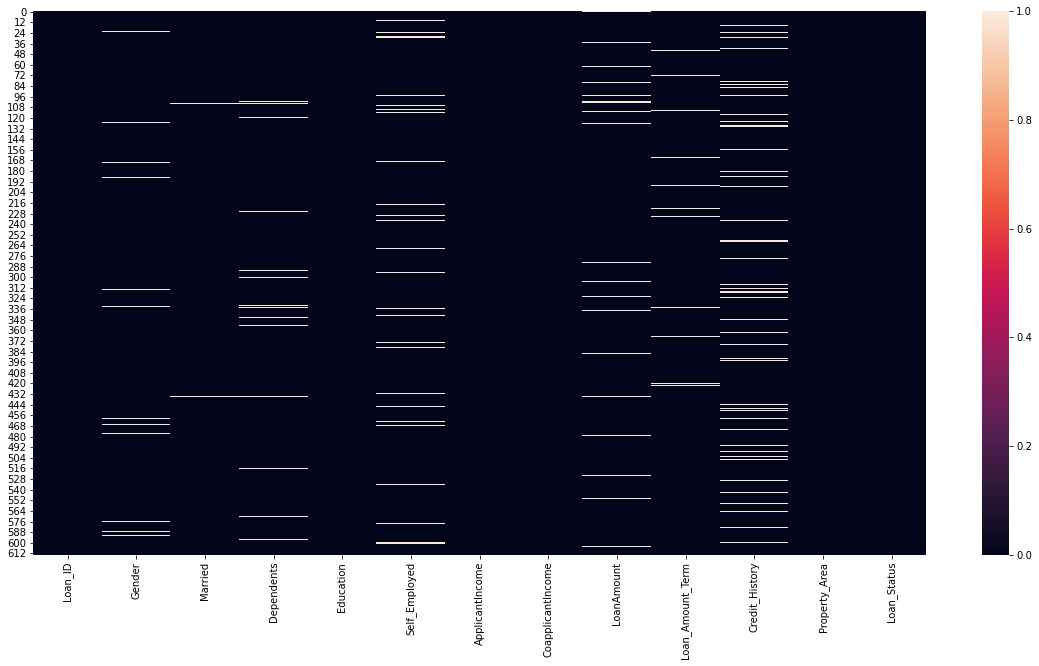

In [7]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
# Handling missing value

In [10]:
df['Gender'].mode()

0    Male
dtype: object

In [11]:
df['Married'].mode()

0    Yes
dtype: object

In [12]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [13]:
df['Dependents'].mode()

0    0
dtype: object

In [14]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [15]:
df['Self_Employed'].mode()

0    No
dtype: object

In [4]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [17]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
df['LoanAmount'].value_counts()

120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: LoanAmount, Length: 203, dtype: int64

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

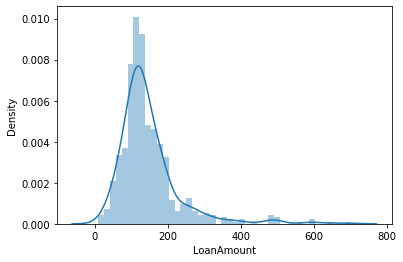

In [19]:
sns.distplot(df['LoanAmount'])

In [20]:
# data is right skewed so taking mean is not rightso we take median

In [21]:
df['LoanAmount'].median()

128.0

In [22]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

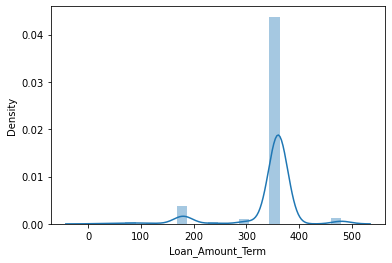

In [23]:
sns.distplot(df['Loan_Amount_Term'])

In [36]:
df['Loan_Amount_Term'].mode()

0    360.0
dtype: float64

In [23]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [34]:
df['Credit_History'].mode()

0    1.0
dtype: float64

In [35]:
df['Credit_History'].median()

1.0

In [5]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

In [41]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# EDA Analysis

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [7]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614,614
unique,614,2,2,4,2,2,3,2
top,LP001487,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,502,401,360,480,532,233,422


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# Data visualization

<Figure size 720x360 with 0 Axes>

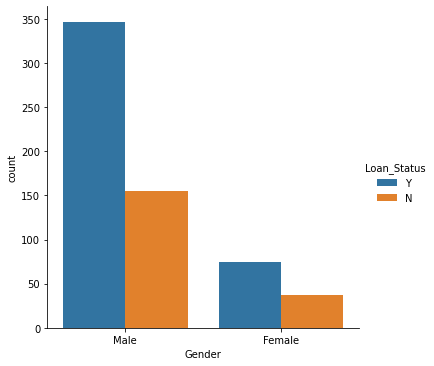

In [64]:
plt.figure(figsize=(10,5))
sns.catplot(x='Gender',hue='Loan_Status',kind='count',data=df)
plt.show()

In [17]:
pd.crosstab(columns=[df.Loan_Status],index=[df.Gender],margins=True,normalize='index')

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.308765,0.691235
All,0.312704,0.687296


In [ ]:
# Male has slight more chances to approve loan than female

<Figure size 720x360 with 0 Axes>

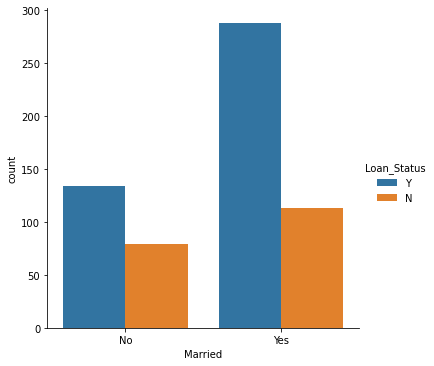

In [65]:
plt.figure(figsize=(10,5))
sns.catplot(x='Married',hue='Loan_Status',kind='count',data=df)
plt.show()

In [18]:
pd.crosstab(columns=[df.Loan_Status],index=[df.Married],margins=True,normalize='index')

Loan_Status,N,Y
Married,,
No,0.370892,0.629108
Yes,0.281796,0.718204
All,0.312704,0.687296


In [ ]:
# Married people have more chances to approve loan

<Figure size 720x360 with 0 Axes>

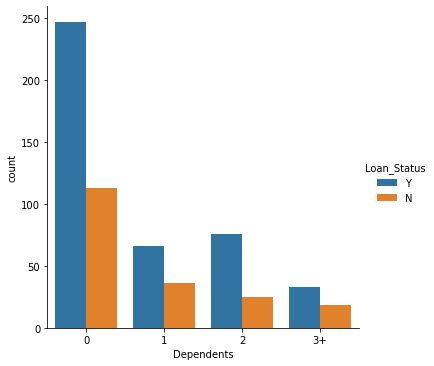

In [66]:
plt.figure(figsize=(10,5))
sns.catplot(x='Dependents',hue='Loan_Status',kind='count',data=df)
plt.show()

In [19]:
pd.crosstab(columns=[df.Loan_Status],index=[df.Dependents],margins=True,normalize='index')

Loan_Status,N,Y
Dependents,,
0,0.313889,0.686111
1,0.352941,0.647059
2,0.247525,0.752475
3+,0.352941,0.647059
All,0.312704,0.687296


In [ ]:
# zero dependency has more chances for loan approval.Overall 68% chances of loan approval for dependent people

<Figure size 720x360 with 0 Axes>

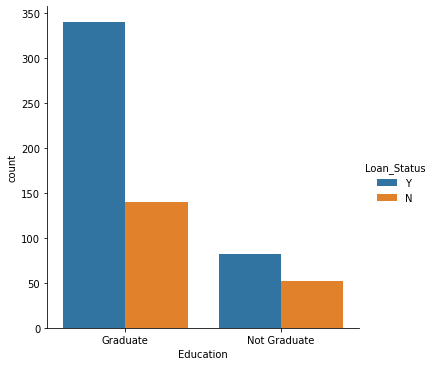

In [87]:
plt.figure(figsize=(10,5))
sns.catplot(x='Education',hue='Loan_Status',kind='count',data=df)
plt.show()

In [20]:
pd.crosstab(columns=[df.Loan_Status],index=[df.Education],margins=True,normalize='index')

Loan_Status,N,Y
Education,,
Graduate,0.291667,0.708333
Not Graduate,0.388060,0.611940
All,0.312704,0.687296


In [ ]:
# Graduate has more chances to approve loan

<Figure size 720x360 with 0 Axes>

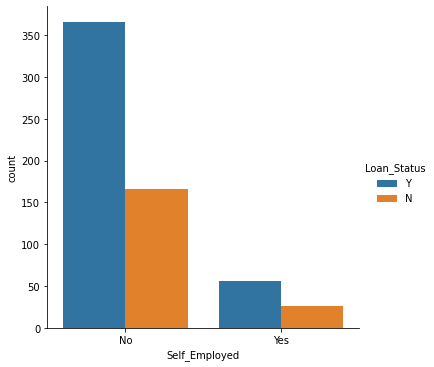

In [88]:
plt.figure(figsize=(10,5))
sns.catplot(x='Self_Employed',hue='Loan_Status',kind='count',data=df)
plt.show()

In [21]:
pd.crosstab(columns=[df.Loan_Status],index=[df.Self_Employed],margins=True,normalize='index')

Loan_Status,N,Y
Self_Employed,,
No,0.312030,0.687970
Yes,0.317073,0.682927
All,0.312704,0.687296


In [ ]:
# person is not self employed having slight more chances of loan approval

<Figure size 720x360 with 0 Axes>

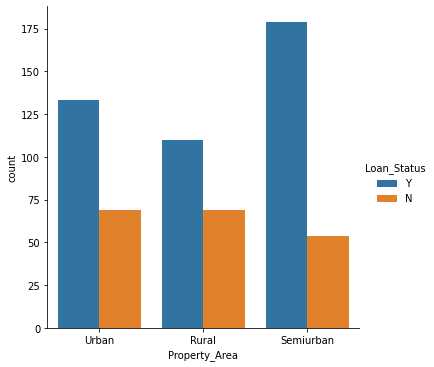

In [89]:
plt.figure(figsize=(10,5))
sns.catplot(x='Property_Area',hue='Loan_Status',kind='count',data=df)
plt.show()

In [22]:
pd.crosstab(columns=[df.Loan_Status],index=[df.Property_Area],margins=True,normalize='index')

Loan_Status,N,Y
Property_Area,,
Rural,0.385475,0.614525
Semiurban,0.231760,0.768240
Urban,0.341584,0.658416
All,0.312704,0.687296


In [ ]:
# Semiurban people has more chances to pass loan

In [ ]:
# Loan_ID is not related with Loan_Status

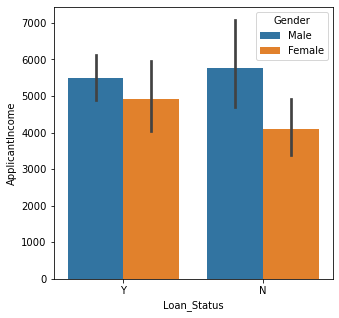

In [108]:
plt.figure(figsize=(5,5))
sns.barplot(x='Loan_Status',y='ApplicantIncome',hue='Gender',data=df)
plt.show()

In [23]:
pd.crosstab(columns=[df.Loan_Status],index=[df.ApplicantIncome],margins=True,normalize='index')

Loan_Status,N,Y
ApplicantIncome,,
150,1.000000,0.000000
210,0.000000,1.000000
416,1.000000,0.000000
645,0.000000,1.000000
674,0.000000,1.000000
...,...,...
39999,0.000000,1.000000
51763,0.000000,1.000000
63337,0.000000,1.000000


In [ ]:
# If applicants income is more chances of loan approval is more

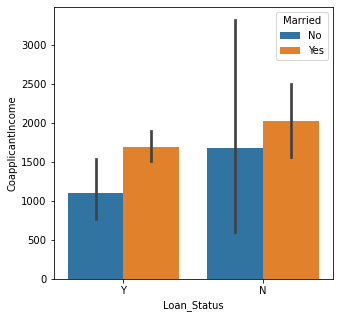

In [109]:
plt.figure(figsize=(5,5))
sns.barplot(x='Loan_Status',y='CoapplicantIncome',hue='Married',data=df)
plt.show()

In [24]:
pd.crosstab(columns=[df.Loan_Status],index=[df.CoapplicantIncome],margins=True,normalize='index')

Loan_Status,N,Y
CoapplicantIncome,,
0.0,0.351648,0.648352
16.12000084,0.000000,1.000000
189.0,0.000000,1.000000
240.0,0.000000,1.000000
242.0,0.000000,1.000000
...,...,...
11300.0,1.000000,0.000000
20000.0,0.500000,0.500000
33837.0,1.000000,0.000000


In [ ]:
# coapplicants income are not directly related to loan pass, overall 68% chances to approve loan for coapplicants income

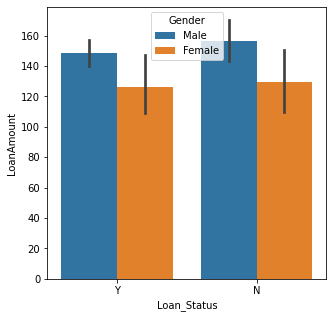

In [112]:
plt.figure(figsize=(5,5))
sns.barplot(x='Loan_Status',y='LoanAmount',hue='Gender',data=df)
plt.show()

In [ ]:
# male has high loan_amount than female and approval chances are more

In [25]:
pd.crosstab(columns=[df.Loan_Status],index=[df.LoanAmount],margins=True,normalize='index')

Loan_Status,N,Y
LoanAmount,,
9.0,1.000000,0.000000
17.0,0.000000,1.000000
25.0,0.000000,1.000000
26.0,0.000000,1.000000
30.0,0.000000,1.000000
...,...,...
570.0,1.000000,0.000000
600.0,0.000000,1.000000
650.0,0.000000,1.000000


In [ ]:
# 68% loanamount is dependent on loan approval

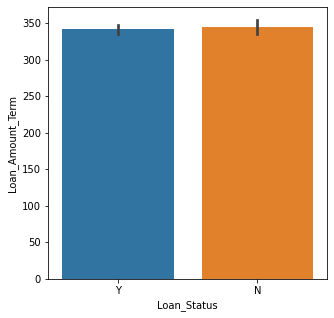

In [101]:
plt.figure(figsize=(5,5))
sns.barplot(x='Loan_Status',y='Loan_Amount_Term',data=df)
plt.show()

In [26]:
pd.crosstab(columns=[df.Loan_Status],index=[df.Loan_Amount_Term],margins=True,normalize='index')

Loan_Status,N,Y
Loan_Amount_Term,,
12.0,0.000000,1.000000
36.0,1.000000,0.000000
60.0,0.000000,1.000000
84.0,0.250000,0.750000
120.0,0.000000,1.000000
180.0,0.340909,0.659091
240.0,0.250000,0.750000
300.0,0.384615,0.615385
360.0,0.302281,0.697719


In [ ]:
# loan_amoont_term is 68% depent on loan status

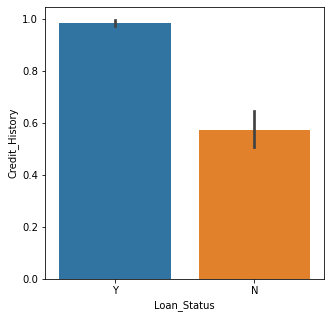

In [102]:
plt.figure(figsize=(5,5))
sns.barplot(x='Loan_Status',y='Credit_History',data=df)
plt.show()

In [28]:
pd.crosstab(columns=[df.Credit_History],index=[df.Loan_Status],margins=True,normalize='index')

Credit_History,0.0,1.0
Loan_Status,,
N,0.427083,0.572917
Y,0.016588,0.983412
All,0.144951,0.855049


In [ ]:
# if past credit_history is present chances of approval of loan is more

In [6]:
df['Total_Income']=(df['ApplicantIncome']+df['CoapplicantIncome'])

In [7]:
df['EMI']=(df['LoanAmount']/df['Loan_Amount_Term'])

In [32]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,EMI
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,0.355556
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,0.355556
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,0.183333
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,0.333333
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,0.391667


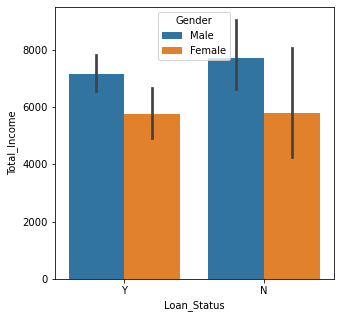

In [10]:
plt.figure(figsize=(5,5))
sns.barplot(x='Loan_Status',y='Total_Income',hue='Gender',data=df)
plt.show()

<AxesSubplot:xlabel='Loan_Status', ylabel='Total_Income'>

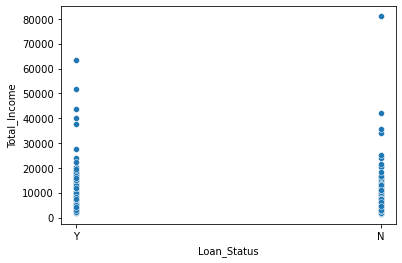

In [36]:
sns.scatterplot(x='Loan_Status',y='Total_Income',data=df)

In [14]:
pd.crosstab(columns=[df.Loan_Status],index=[df.Total_Income],margins=True,normalize='index')

Loan_Status,N,Y
Total_Income,,
1442.0,1.000000,0.000000
1830.0,1.000000,0.000000
1880.0,1.000000,0.000000
1950.0,1.000000,0.000000
1963.0,0.000000,1.000000
...,...,...
43897.0,0.000000,1.000000
51763.0,0.000000,1.000000
63337.0,0.000000,1.000000


<AxesSubplot:xlabel='Loan_Status', ylabel='EMI'>

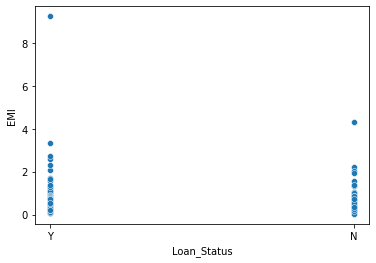

In [35]:
sns.scatterplot(x='Loan_Status',y='EMI',data=df)

In [ ]:
# people whose total income in high chances of loan approval is more

In [32]:
pd.crosstab(columns=[df.EMI],index=[df.Loan_Status],margins=True,normalize='index')

EMI,0.025000,0.072222,0.083333,0.097222,0.100000,0.111111,0.122222,0.125000,0.127778,0.130556,...,1.944444,2.047619,2.083333,2.222222,2.333333,2.583333,2.722222,3.333333,4.305556,9.250000
Loan_Status,,,,,,,,,,,,,,,,,,,,,
N,0.005208,0.000000,0.000000,0.005208,0.000000,0.000000,0.000000,0.000000,0.005208,0.000000,...,0.005208,0.005208,0.000000,0.005208,0.000000,0.000000,0.000000,0.000000,0.005208,0.000000
Y,0.000000,0.002370,0.004739,0.000000,0.002370,0.002370,0.004739,0.002370,0.000000,0.002370,...,0.000000,0.000000,0.002370,0.000000,0.002370,0.002370,0.002370,0.002370,0.000000,0.002370
All,0.001629,0.001629,0.003257,0.001629,0.001629,0.001629,0.003257,0.001629,0.001629,0.001629,...,0.001629,0.001629,0.001629,0.001629,0.001629,0.001629,0.001629,0.001629,0.001629,0.001629


In [ ]:
# EMI is not directly related with loan status

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le=LabelEncoder()

In [35]:
var=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for i in var:
    df[i]=le.fit_transform(df[i])

In [36]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,EMI
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,5849.0,0.355556
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0,0.355556
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0,0.183333
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0,0.333333
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0,0.391667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1,2900.0,0.197222
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1,4106.0,0.222222
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1,8312.0,0.702778
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1,7583.0,0.519444


In [ ]:
# Loan_ID is not related with loan_Status so we drop this

In [37]:
df=df.drop(columns='Loan_ID',axis=1)

In [38]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,EMI
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,5849.0,0.355556
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0,0.355556
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0,0.183333
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0,0.333333
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0,0.391667


In [ ]:
# Checking correlation

In [39]:
corr=df.corr()
corr.shape

(14, 14)

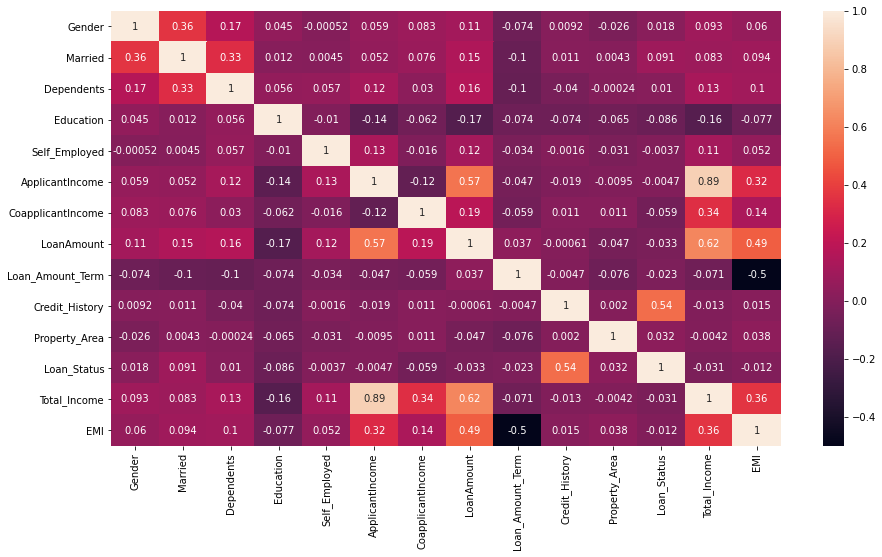

In [40]:
plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True)
plt.show()

In [41]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,EMI
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,0.009170,-0.025752,0.017987,0.093191,0.059760
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.010938,0.004257,0.091478,0.083319,0.093830
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.040160,-0.000244,0.010118,0.125590,0.103277
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.073658,-0.065243,-0.085884,-0.161362,-0.077175
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,-0.001550,-0.030860,-0.003700,0.113000,0.051766
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.018615,-0.009500,-0.004710,0.893037,0.320543
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,0.011134,0.010522,-0.059187,0.342781,0.136378
LoanAmount,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.000607,-0.046632,-0.033214,0.620316,0.491989
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.004705,-0.076120,-0.022549,-0.070917,-0.500119
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.000607,-0.004705,1.000000,0.001963,0.540556,-0.012563,0.015206


In [42]:
corr['Loan_Status'].sort_values()

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.033214
Total_Income        -0.031271
Loan_Amount_Term    -0.022549
EMI                 -0.011757
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540556
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

In [ ]:
# features are slightly correlated with target.Education,CoapplicantIncome,LoanaAmount,Loan_Amount_Term,Self_Employed 
# are negetively related with Loan_Status

# Gender,Married,Dependent are correlated to each other.
# Loan_amount,ApplicantIncome,CoApplicatIncome are highly correlated
# EMI,Loan_Amount_Term,Loan_status,Credit_history also correlated with each other

In [ ]:
# checking skewness

In [46]:
df.skew().sort_values(ascending=False)

EMI                 9.960701
ApplicantIncome     6.539513
Total_Income        5.633449
LoanAmount          2.743053
Self_Employed       2.159796
Education           1.367622
Dependents          1.015551
Property_Area      -0.066196
Married            -0.644850
Loan_Status        -0.809998
Gender             -1.648795
Credit_History     -2.021971
Loan_Amount_Term   -2.402112
dtype: float64

In [ ]:
## we will drop CoapplicantIncomeand check skewnwss

In [45]:
df=df.drop(columns='CoapplicantIncome',axis=1)

In [47]:
df.skew().sort_values(ascending=False)

EMI                 9.960701
ApplicantIncome     6.539513
Total_Income        5.633449
LoanAmount          2.743053
Self_Employed       2.159796
Education           1.367622
Dependents          1.015551
Property_Area      -0.066196
Married            -0.644850
Loan_Status        -0.809998
Gender             -1.648795
Credit_History     -2.021971
Loan_Amount_Term   -2.402112
dtype: float64

<AxesSubplot:xlabel='EMI', ylabel='Density'>

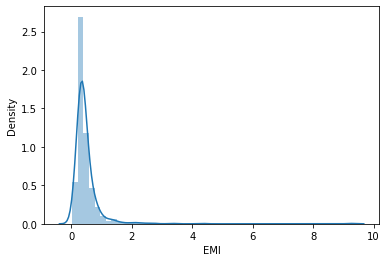

In [49]:
sns.distplot(df['EMI'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

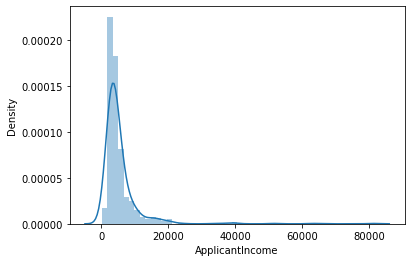

In [50]:
sns.distplot(df['ApplicantIncome'])

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

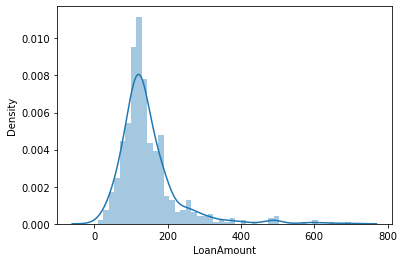

In [52]:
sns.distplot(df['LoanAmount'])

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

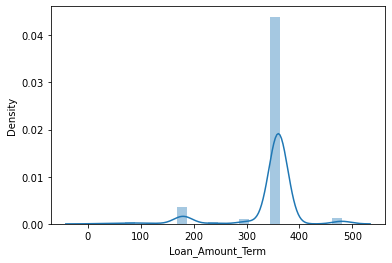

In [53]:
sns.distplot(df['Loan_Amount_Term'])

<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

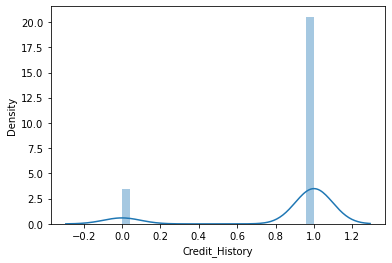

In [54]:
sns.distplot(df['Credit_History'])

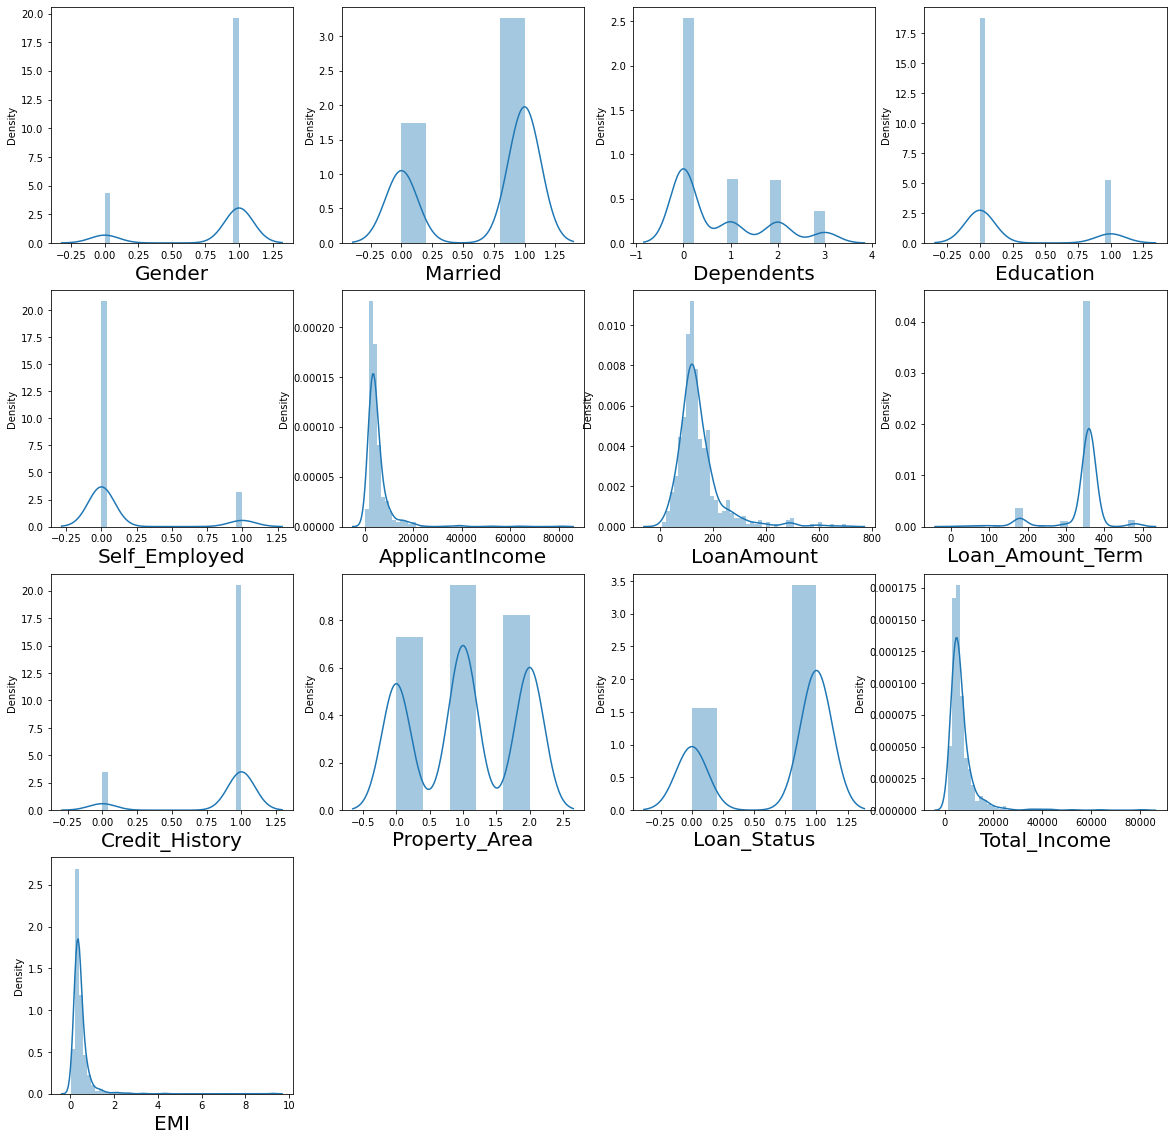

In [55]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in df:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

In [ ]:
# We will power transform and check skewness

In [56]:
from sklearn.preprocessing import power_transform

In [58]:
x=df.drop(columns='Loan_Status',axis=1)
y=df['Loan_Status']

In [59]:
df1=power_transform(x)

In [60]:
type(df1)

numpy.ndarray

In [61]:
df1=pd.DataFrame(df1,columns=x.columns)

In [62]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,EMI
0,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.544331,-0.025462,0.175540,0.411733,1.193567,0.0,-0.128644
1,0.472343,0.728816,0.854259,-0.528362,-0.392601,0.170974,-0.025462,0.175540,0.411733,-1.350003,0.0,-0.128644
2,0.472343,0.728816,-0.827104,-0.528362,2.547117,-0.499955,-1.339826,0.175540,0.411733,1.193567,0.0,-1.514371
3,0.472343,0.728816,-0.827104,1.892641,-0.392601,-0.743873,-0.155876,0.175540,0.411733,1.193567,0.0,-0.268361
4,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.582817,0.170931,0.175540,0.411733,1.193567,0.0,0.079658
...,...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.827104,-0.528362,-0.392601,-0.554885,-1.197589,0.175540,0.411733,-1.350003,0.0,-1.371732
610,0.472343,0.728816,1.522278,-0.528362,-0.392601,-0.000290,-2.296436,-2.312879,0.411733,-1.350003,0.0,-1.131153
611,0.472343,0.728816,0.854259,-0.528362,-0.392601,1.023487,1.381387,0.175540,0.411733,1.193567,0.0,1.228630
612,0.472343,0.728816,1.316702,-0.528362,-0.392601,0.931750,0.750522,0.175540,0.411733,1.193567,0.0,0.666703


In [63]:
df1.shape

(614, 12)

In [64]:
df1.skew().sort_values(ascending=False)

Self_Employed       2.159796
Education           1.367622
Dependents          0.441404
Loan_Amount_Term    0.392571
EMI                 0.061906
LoanAmount          0.020831
Total_Income        0.000000
ApplicantIncome    -0.092946
Property_Area      -0.158267
Married            -0.644850
Gender             -1.648795
Credit_History     -2.021971
dtype: float64

In [ ]:
# skewness decrease but Self_Employed,Education,Credit_History,Gender have some skewness but we consider it.

In [65]:
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [66]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [67]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.170876,Gender
1,1.282204,Married
2,1.166228,Dependents
3,1.064353,Education
4,1.024902,Self_Employed
5,4.993494,ApplicantIncome
6,2.246663,LoanAmount
7,1.616710,Loan_Amount_Term
8,1.008695,Credit_History
9,1.016964,Property_Area


In [ ]:
# VIF value is <5 so there is no multicolinearity exist between features and target
# but Total_Income vif value is >5 but we consider it.

In [ ]:
##checking Outliers

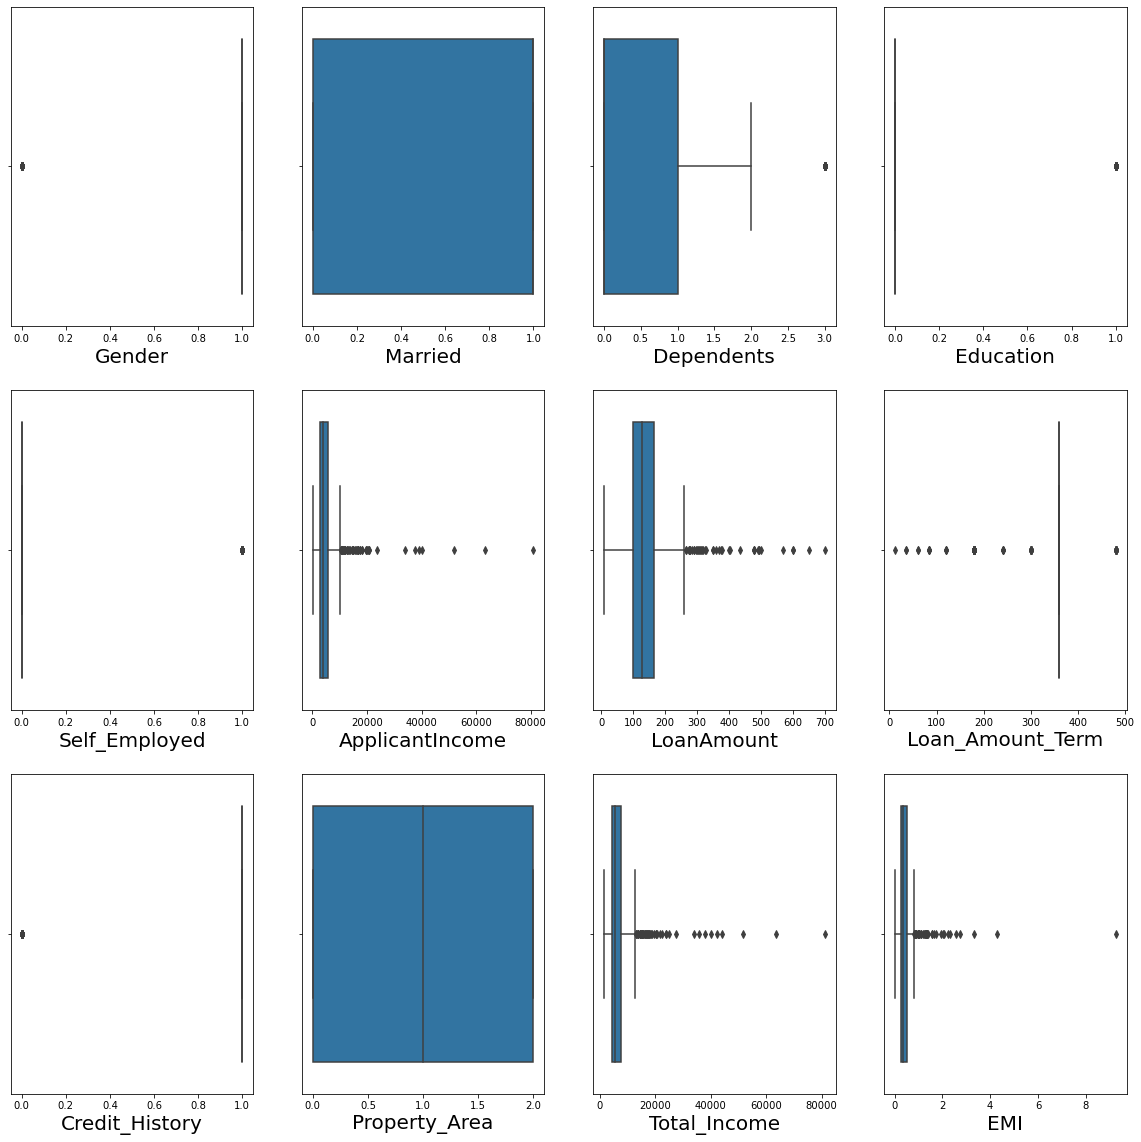

In [68]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in x:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.boxplot(x[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [70]:
from scipy.stats import zscore

In [73]:
z_score=zscore(df[['Gender','Education','Dependents','Credit_History','Total_Income','EMI','Self_Employed','ApplicantIncome','LoanAmount','Loan_Amount_Term']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df[filtering_entry]

In [74]:
df.shape

(580, 13)

In [75]:
x=df.drop(columns='Loan_Status',axis=1)
y=df['Loan_Status']

In [77]:
(np.abs(zscore(x))<3).all()

False

In [78]:
z_score=zscore(df[['Gender','Education','Dependents','Credit_History','Total_Income','EMI','Self_Employed','ApplicantIncome','LoanAmount','Loan_Amount_Term']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df[filtering_entry]

In [79]:
df.shape

(511, 13)

In [80]:
x=df.drop(columns='Loan_Status',axis=1)
y=df['Loan_Status']

In [81]:
(np.abs(zscore(x))<3).all()

False

In [91]:
data_loss=((614-511)/614)*100
data_loss

16.775244299674267

In [ ]:
# 16% dataloss

In [ ]:
# Outliers is removed

In [ ]:
# Now Loan_application Dataset is ready for training 

In [82]:
y.value_counts()

1    354
0    157
Name: Loan_Status, dtype: int64

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=42)

In [ ]:
# Handling Imbalanced Dataset

In [ ]:
# Over Sampling for minority or Under Sampling for majority class
# Here we will do over-sampling.
# Here we use SMOTE(Synthetic Minority Oversampling Technique)

In [87]:
from imblearn.over_sampling import SMOTE

In [88]:
oversampler=SMOTE(random_state=42)
x_train_ns,y_train_ns=oversampler.fit_resample(x_train,y_train)

In [89]:
x_train_ns.shape,y_train_ns.shape,x_test.shape,y_test.shape

((520, 12), (520,), (128, 12), (128,))

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# though we have done oversampling,there is a chance of getting high value of accuracy so we consider confusion
# matrix,precion ,recall and f1score

In [92]:
lr=LogisticRegression()
lr.fit(x_train_ns,y_train_ns)
y_pred_lr=lr.predict(x_test)
acc_lr=accuracy_score(y_test,y_pred_lr)*100
acc_lr

80.46875

In [93]:
print(confusion_matrix(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))

[[21 13]
 [12 82]]
              precision    recall  f1-score   support

           0       0.64      0.62      0.63        34
           1       0.86      0.87      0.87        94

    accuracy                           0.80       128
   macro avg       0.75      0.74      0.75       128
weighted avg       0.80      0.80      0.80       128



In [100]:
# SUPPORT VECTOR CLASSIFIER
from sklearn.svm import SVC 
svc=SVC()
svc.fit(x_train_ns,y_train_ns)
y_pred_svc=svc.predict(x_test)
acc_svc=accuracy_score(y_test,y_pred_svc)*100
acc_svc

82.8125

In [101]:
print(confusion_matrix(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))

[[19 15]
 [ 7 87]]
              precision    recall  f1-score   support

           0       0.73      0.56      0.63        34
           1       0.85      0.93      0.89        94

    accuracy                           0.83       128
   macro avg       0.79      0.74      0.76       128
weighted avg       0.82      0.83      0.82       128



In [98]:
# DECISIONTREE CLASSIFIER

dt=DecisionTreeClassifier()
dt.fit(x_train_ns,y_train_ns)
y_pred_dt=dt.predict(x_test)
acc_dt=accuracy_score(y_test,y_pred_dt)*100
acc_dt

74.21875

In [99]:
print(confusion_matrix(y_test,y_pred_dt))
print(classification_report(y_test,y_pred_dt))

[[22 12]
 [21 73]]
              precision    recall  f1-score   support

           0       0.51      0.65      0.57        34
           1       0.86      0.78      0.82        94

    accuracy                           0.74       128
   macro avg       0.69      0.71      0.69       128
weighted avg       0.77      0.74      0.75       128



In [96]:
# RANDOM FOREST CLASSIFIER

rfc=RandomForestClassifier()
rfc.fit(x_train_ns,y_train_ns)
y_pred_rfc=rfc.predict(x_test)
acc_rfc=accuracy_score(y_test,y_pred_rfc)*100
acc_rfc

79.6875

In [97]:
print(confusion_matrix(y_test,y_pred_rfc))
print(classification_report(y_test,y_pred_rfc))

[[19 15]
 [11 83]]
              precision    recall  f1-score   support

           0       0.63      0.56      0.59        34
           1       0.85      0.88      0.86        94

    accuracy                           0.80       128
   macro avg       0.74      0.72      0.73       128
weighted avg       0.79      0.80      0.79       128



In [94]:
# KNN CLASSIFIER

knn=KNeighborsClassifier()
knn.fit(x_train_ns,y_train_ns)
y_pred_knn=knn.predict(x_test)
acc_knn=accuracy_score(y_test,y_pred_knn)*100
acc_knn

69.53125

In [95]:
print(confusion_matrix(y_test,y_pred_knn))
print(classification_report(y_test,y_pred_knn))

[[21 13]
 [26 68]]
              precision    recall  f1-score   support

           0       0.45      0.62      0.52        34
           1       0.84      0.72      0.78        94

    accuracy                           0.70       128
   macro avg       0.64      0.67      0.65       128
weighted avg       0.74      0.70      0.71       128



In [102]:
# XG Boost
from xgboost import XGBClassifier
xgb=XGBClassifier(objective='binary:logistic')
xgb.fit(x_train_ns,y_train_ns)
y_pred_xgb=knn.predict(x_test)
acc_xgb=accuracy_score(y_test,y_pred_xgb)*100
acc_xgb

[21:57:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


69.53125

In [103]:
print(confusion_matrix(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb))

[[21 13]
 [26 68]]
              precision    recall  f1-score   support

           0       0.45      0.62      0.52        34
           1       0.84      0.72      0.78        94

    accuracy                           0.70       128
   macro avg       0.64      0.67      0.65       128
weighted avg       0.74      0.70      0.71       128



In [104]:
# Model Evaluation

Models=pd.DataFrame({'model':['Logistic Regression','Support Vector Classifier',
                            'DecisionTree Classifier','Random Forest Classifier','Kneighbors Clasifier','XGBoost'],
                    
                      'score':[acc_lr,acc_svc,acc_dt,acc_rfc,acc_knn,acc_xgb]})
Models

,model,score
0,Logistic Regression,80.46875
1,Support Vector Classifier,82.81250
2,DecisionTree Classifier,74.21875
3,Random Forest Classifier,79.68750
4,Kneighbors Clasifier,69.53125
5,XGBoost,69.53125


In [ ]:
# Cross Validation

In [ ]:
# now check for cross validation score as well as overfitting if exist

In [105]:
from sklearn.model_selection import cross_val_score

In [106]:
# Cross-Validation Logistic Regression
cvs_lr=cross_val_score(lr,x,y,cv=5)
print(cvs_lr.mean())

0.8180087569008185


In [107]:
# Cross-Validation SVC
cvs_svc=cross_val_score(svc,x,y,cv=5)
print(cvs_svc.mean())

0.6927660384542167


In [108]:
# Cross-Validation DecisionTree Classifier
cvs_dt=cross_val_score(dt,x,y,cv=5)
print(cvs_dt.mean())

0.7397106415381687


In [109]:
# Cross-Validation KNN
cvs_knn=cross_val_score(knn,x,y,cv=5)
print(cvs_knn.mean())

0.6222729868646488


In [110]:
# Cross-Validation Random Forest Classifier
cvs_rfc=cross_val_score(rfc,x,y,cv=10)
print(cvs_rfc.mean())

0.7984917043740574


In [111]:
# Cross-Validation XGB Classifier
cvs_xgb=cross_val_score(xgb,x,y,cv=5)
print(cvs_xgb.mean())

[22:00:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:00:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:00:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:00:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [ ]:
# Cross-Validation:Random forest(80%), XGB(80%) gives good accuracy but differnce between 
# Accuracy score and CV score is less in Random Forestclassifier and Decision Tree classifier.So both works better. 

In [140]:
from sklearn.feature_selection import SelectPercentile,chi2

In [141]:
spercentile=SelectPercentile(score_func=chi2,percentile=80)

In [142]:
spercentile.fit(x,y)

SelectPercentile(percentile=80,
                 score_func=<function chi2 at 0x000001AC62A21DC0>)

In [143]:
cols=spercentile.get_support(indices=True)

In [144]:
features=x.columns[cols]

In [145]:
df_scores=pd.DataFrame({'features': x.columns,
                        'chi2score': spercentile.scores_,
                        'pvalue': spercentile.pvalues_})

In [146]:
df_scores.sort_values(by='chi2score',ascending=False)

,features,chi2score,pvalue
5,ApplicantIncome,1018.230631,1.957128e-223
10,Total_Income,344.956917,5.313308e-77
8,Credit_History,23.011627,1.610245e-06
7,Loan_Amount_Term,6.216625,1.265561e-02
6,LoanAmount,3.163166,7.531699e-02
3,Education,2.204642,1.375959e-01
1,Married,1.059055,3.034308e-01
4,Self_Employed,0.279299,5.971612e-01
2,Dependents,0.219278,6.395905e-01
0,Gender,0.180488,6.709539e-01


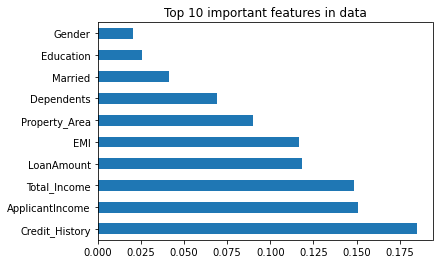

In [147]:
feat_importances = pd.Series(rfc.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 important features in data")
plt.show()

In [ ]:
#these are best features of the dataset

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve

In [ ]:
## hypertuning the model with GridSearchCV (using Random Forest)

In [113]:
parameters={'min_samples_leaf':[1,5,10,15,20],
            'max_depth':[4,5,6,7,8,9,10],
            'criterion':['gini','entropy'],
            'min_samples_split':[2,4,6,8,10,12,14],
             'n_estimators':[50,100,150,200,250]
           }

In [114]:
gscv=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [115]:
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 5, 10, 15, 20],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14],
                         'n_estimators': [50, 100, 150, 200, 250]})

In [116]:
parameters=gscv.best_params_

In [117]:
parameters

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 5,
 'min_samples_split': 14,
 'n_estimators': 50}

In [135]:
clf=RandomForestClassifier(criterion='entropy',max_depth=10,min_samples_leaf=7,min_samples_split=14,n_estimators=100)

In [136]:
clf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=7,
                       min_samples_split=14)

In [137]:
clf_pred=clf.predict(x_test)   

In [138]:
print(accuracy_score(y_test,clf_pred)*100)
print(confusion_matrix(y_test,clf_pred))
print(classification_report(y_test,clf_pred))     

85.9375
[[17 17]
 [ 1 93]]
              precision    recall  f1-score   support

           0       0.94      0.50      0.65        34
           1       0.85      0.99      0.91        94

    accuracy                           0.86       128
   macro avg       0.89      0.74      0.78       128
weighted avg       0.87      0.86      0.84       128



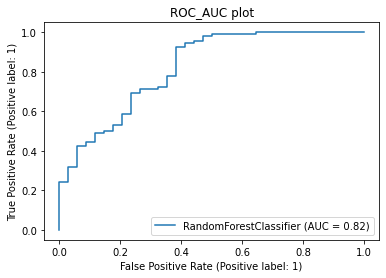

In [139]:
plot_roc_curve(gscv.best_estimator_,x_test,y_test)
plt.title('ROC_AUC plot')
plt.show()

In [148]:
# Saving model
import joblib
joblib.dump(clf,'loan_application_clss.pkl')

['loan_application_clss.pkl']

In [ ]:
# Conclusion

In [150]:
loaded_model = joblib.load(open('loan_application_clss.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print (result)

0.859375


In [151]:
predict_conclusion = pd.DataFrame([loaded_model.predict(x_test)[:], clf_pred[:]], index = ['Predicted', 'Original'])

In [152]:
predict_conclusion

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
Predicted,1,1,1,0,1,1,1,1,0,1,...,0,1,1,1,0,1,0,1,1,1
Original,1,1,1,0,1,1,1,1,0,1,...,0,1,1,1,0,1,0,1,1,1
